## Kalman Filtering


In [1]:
import Simulator
import Observation
import Statistics
import LETKalmanFilter

### Definition of forward model

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators



In [2]:
timestamp = "2021_07_29-12_52_15"

grid, simulator = Simulator.from_file(timestamp)

### Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
import numpy as np

def prior(grid, phi):
    """
    Constructing a Matern-type covariance prior with Matern-parameter phi
    where the matrix is normalized with the standard deviation
    """
    # INPUT! Bell mean
    mean = 0.0*np.ones(grid.N_x)
    # INPUT! Constant var
    var  = 0.5*np.ones(grid.N_x)

    # Matern covariance
    dist_mat = np.copy(grid.dist_mat)
    cov = (1+phi*dist_mat)*np.exp(-phi*dist_mat)
    
    # Normalisation
    var_mesh = np.meshgrid(np.sqrt(var),np.sqrt(var))[0]*np.meshgrid(np.sqrt(var),np.sqrt(var))[1]    

    return mean, var_mesh, cov

Please remember to set priors!


c:\Users\florianb\Documents\advectionDiffusion\Ensemble.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  self.ensemble = np.random.multivariate_normal(mean, cov + nugget*np.eye(self.simulator.grid.N_x), self.N_e).transpose()


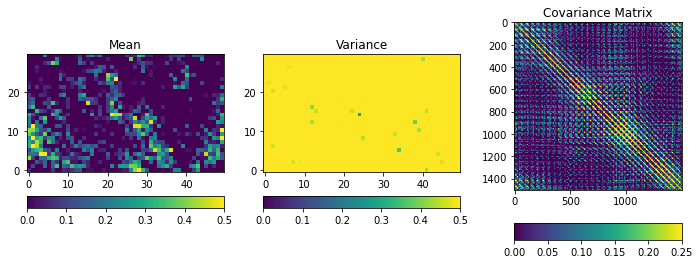

In [4]:
statistics = Statistics.Statistics(simulator, 25)
mean, var_mesh, cov = prior(grid=grid, phi=5.0)
statistics.set(mean, var_mesh*cov, nugget=0.5)
statistics.plot()

### Observations

In [5]:
observation = Observation.from_file(simulator)

Remember to set observation positions and to set values!


### Filtering

In [7]:
letkFilter = LETKalmanFilter.LETKalman(statistics, observation, 5)

In [6]:
from matplotlib import pyplot as plt
plt.imshow()

0
1
2
3
4
5
6
7
8
9


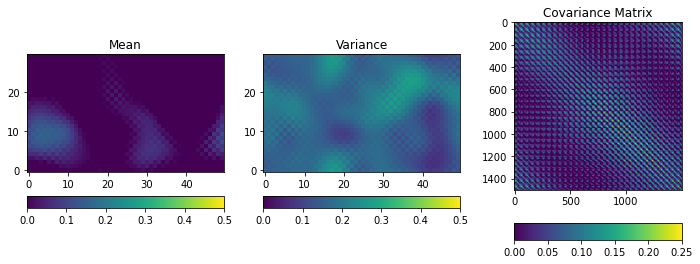

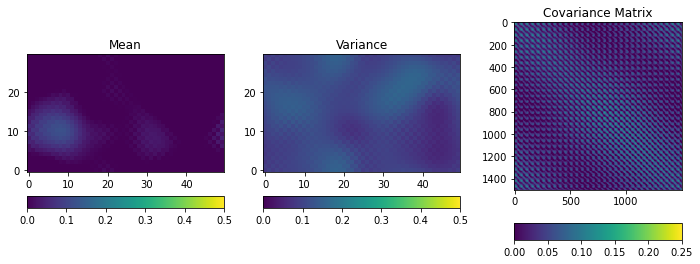

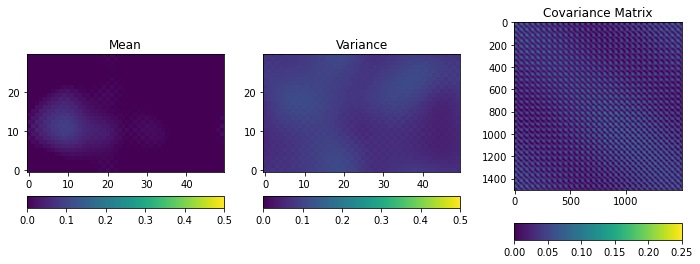

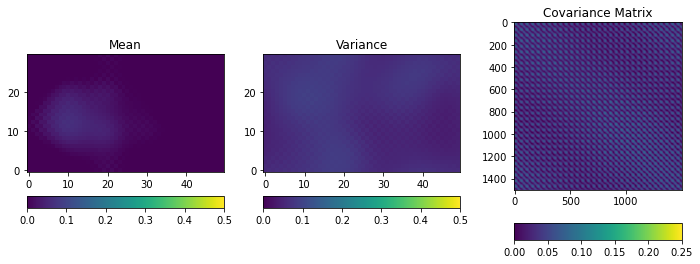

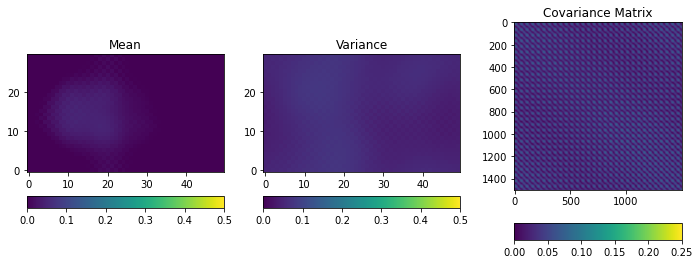

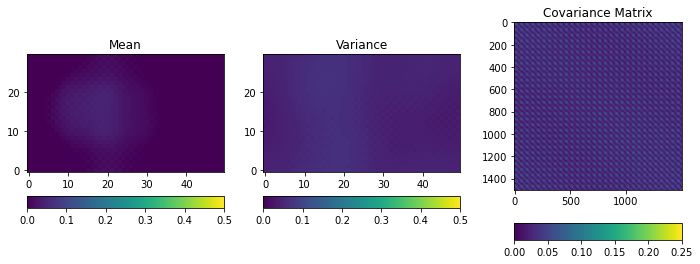

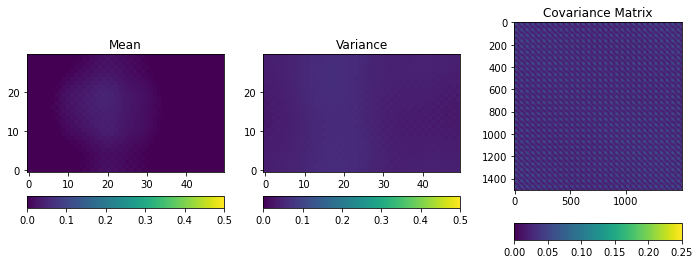

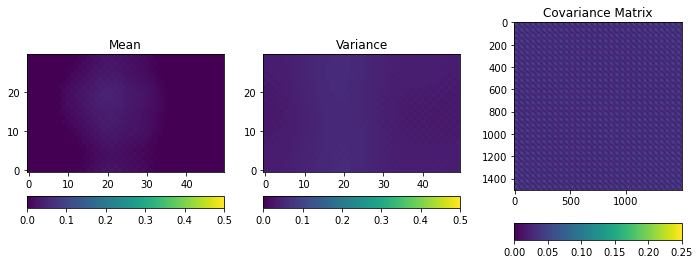

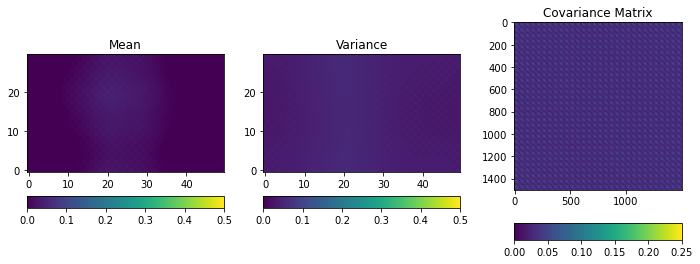

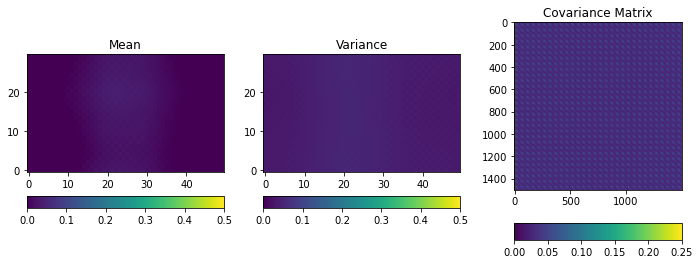

In [8]:
for t in range(observation.N_obs):
    print(t)
    statistics.propagate(25)
    letkFilter.filter(statistics.ensemble.ensemble, observation.obses[t])
    statistics.plot()